In [1]:
#importing the required the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
path='/Users/ajaythirumurthi/Downloads/A'
# combining all the datasets into one list . 

company_list = ['REL.csv', 'INF.csv', 'ITC.csv', 'SBI.csv']

#blank dataframe
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(5948, 7)

In [3]:
all_data.head() 

Date    Open    High     Low   Volume Name   Close
0  2017-01-02  536.91  539.88  531.14  1622458  REL  537.46
1  2017-01-03  539.81  543.35  535.47  1470751  REL  539.59
2  2017-01-04  541.32  541.37  527.15  2375547  REL  528.56
3  2017-01-05  530.47  534.88  529.36  1996483  REL  533.64
4  2017-01-06  532.06  537.41  531.51  1793427  REL  532.43

In [4]:
all_data.head(-5) 

Date    Open    High     Low    Volume Name   Close
0     2017-01-02  536.91  539.88  531.14   1622458  REL  537.46
1     2017-01-03  539.81  543.35  535.47   1470751  REL  539.59
2     2017-01-04  541.32  541.37  527.15   2375547  REL  528.56
3     2017-01-05  530.47  534.88  529.36   1996483  REL  533.64
4     2017-01-06  532.06  537.41  531.51   1793427  REL  532.43
...          ...     ...     ...     ...       ...  ...     ...
1477  2022-12-19  604.00  609.50  603.00   8322012  SBI  604.45
1478  2022-12-20  603.00  606.50  599.55   6753785  SBI  604.45
1479  2022-12-21  605.90  609.15  589.60   9217253  SBI  593.40
1480  2022-12-22  597.00  599.00  587.55   8740149  SBI  593.40
1481  2022-12-23  590.00  590.70  571.50  13047046  SBI  574.00

[5943 rows x 7 columns]

In [5]:
# type of data in each columns
all_data.dtypes

Date       object
Open      float64
High      float64
Low       float64
Volume      int64
Name       object
Close     float64
dtype: object

In [6]:
#converting the data to proper date using to_datetime function.
all_data['Date'] = pd.to_datetime(all_data['Date'])

In [7]:
#retrieving all unique values or name of stocks
tech_list = all_data['Name'].unique() 

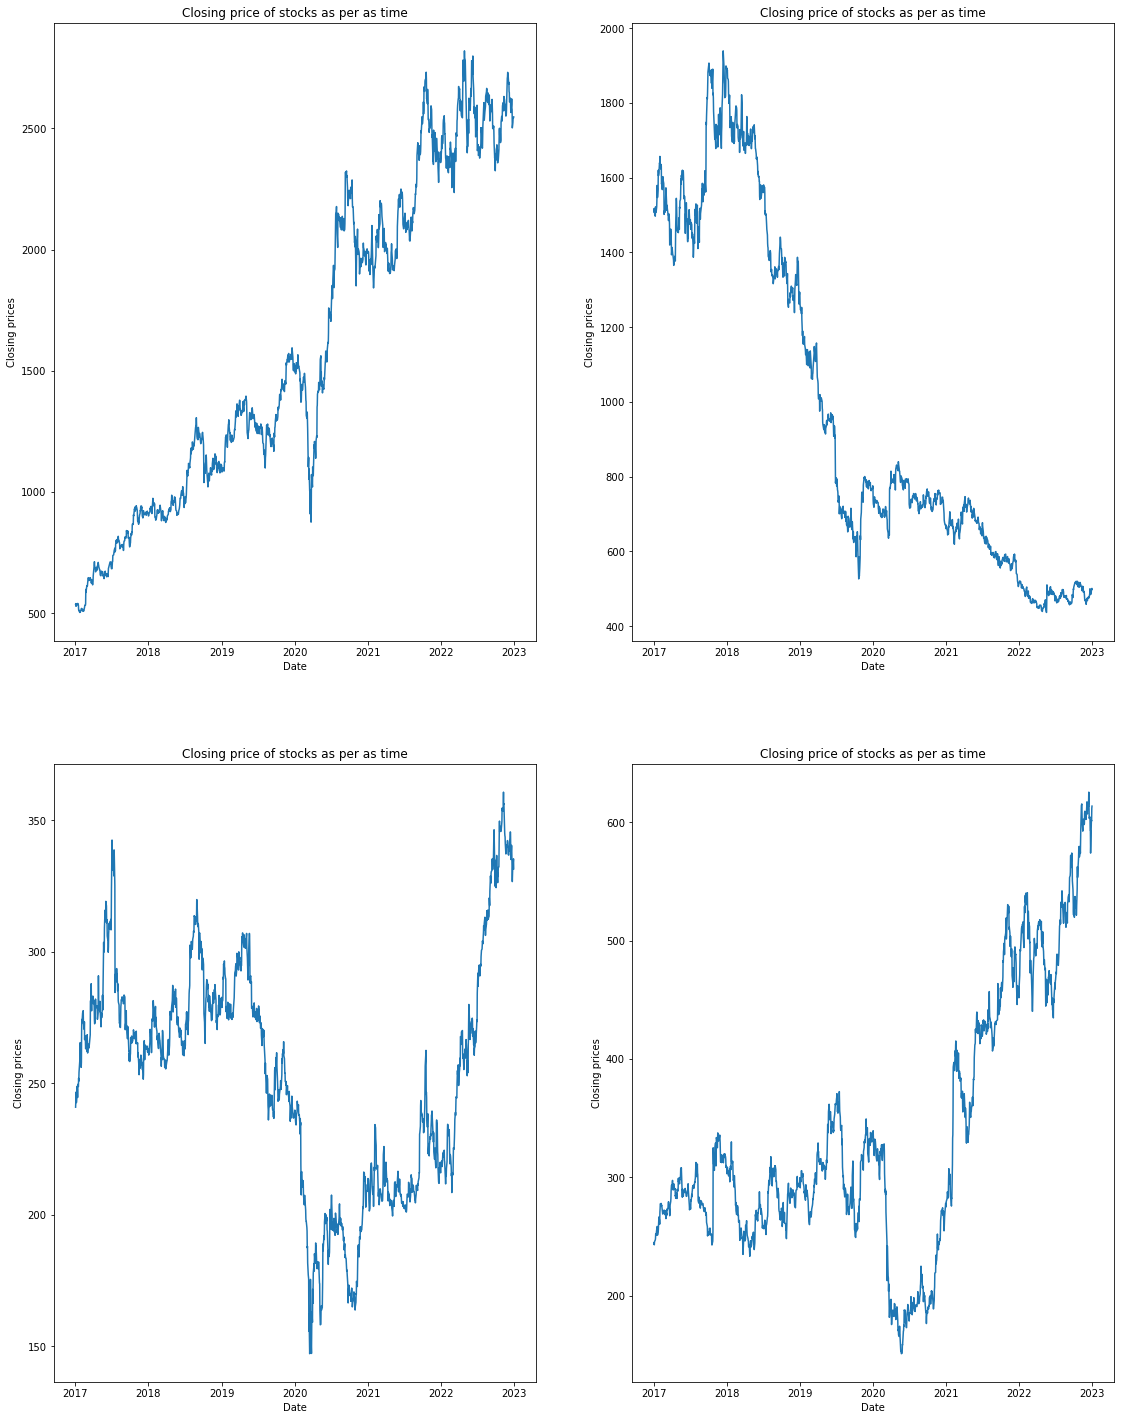

In [8]:
#ploting all the closing data
plt.figure(figsize=(19,25))

for i , company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df = all_data[all_data["Name"] == company]
    plt.plot(df['Date'],df['Close'])
    plt.xlabel("Date")
    plt.ylabel("Closing prices")
    plt.title("Closing price of stocks as per as time")

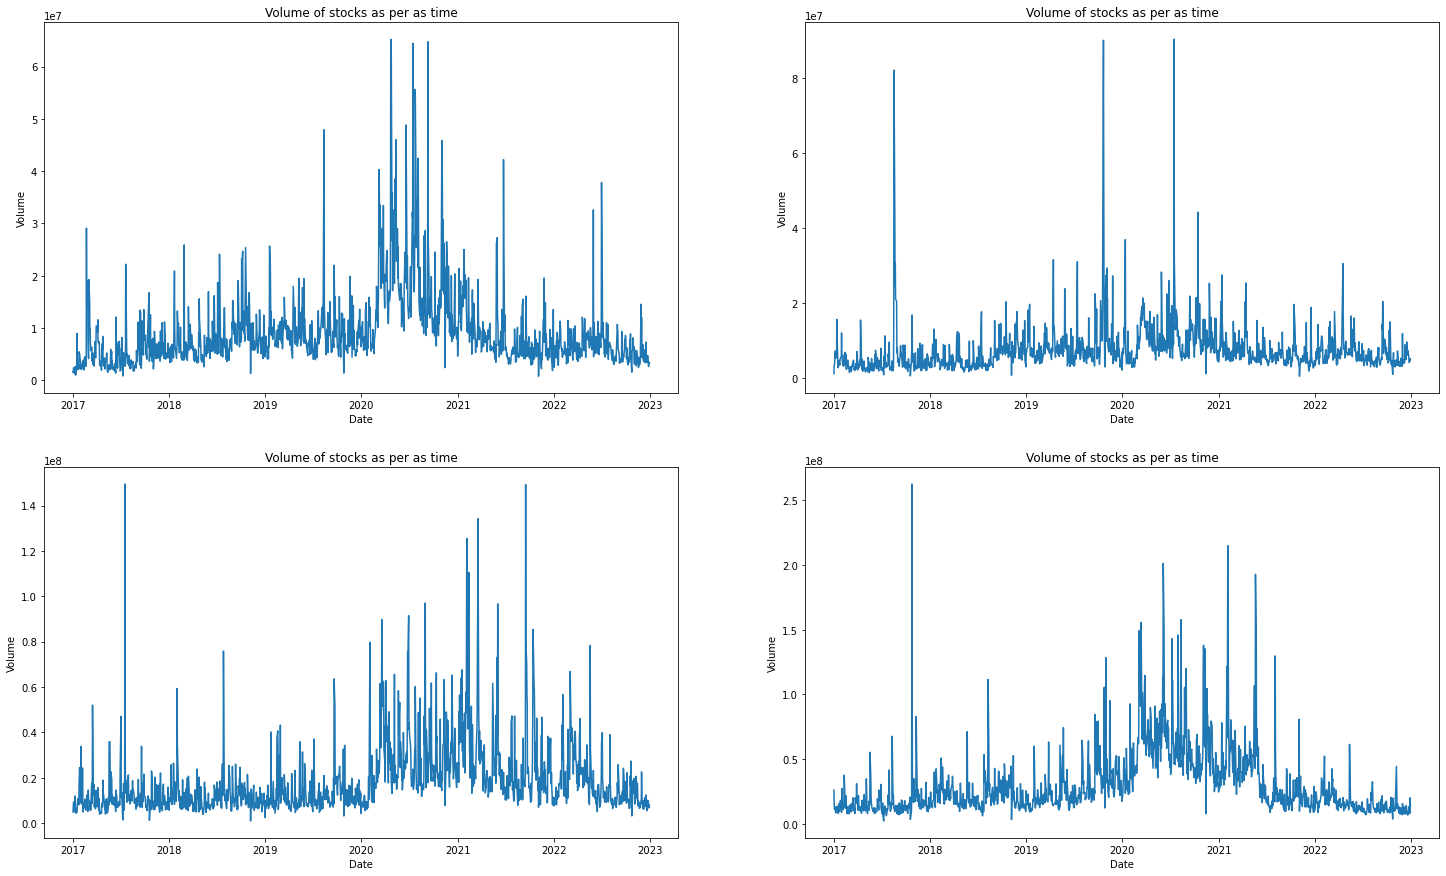

In [9]:
#Analysis of the amount of volume been traded everyday.
plt.figure(figsize = (25,15))

for i ,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df = all_data[all_data['Name'] == company]
    plt.plot(df["Date"],df["Volume"])
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.title("Volume of stocks as per as time")

In [10]:
import plotly.express as px

In [11]:
for company in (tech_list):
    df = all_data[all_data['Name'] == company]
    graph =  px.line(df , x = "Date", y = "Volume" , title = "Company")
    graph.show()

In [12]:
# calculationg for the Relience stock : 

df = pd.read_csv("REL.csv")


# Hope Relience gets impressed by this :)

In [13]:
df.head()

Date    Open    High     Low   Volume Name   Close
0  2017-01-02  536.91  539.88  531.14  1622458  REL  537.46
1  2017-01-03  539.81  543.35  535.47  1470751  REL  539.59
2  2017-01-04  541.32  541.37  527.15  2375547  REL  528.56
3  2017-01-05  530.47  534.88  529.36  1996483  REL  533.64
4  2017-01-06  532.06  537.41  531.51  1793427  REL  532.43

In [14]:
# Difference in terms of percentage and appending it to the existing Df : 

df['1 day % return'] = ((df['Close'] - df['Open'] / df['Close'])) * 100

In [15]:
# checking whether the column we added exists or not . 

df.columns

Index(['Date', 'Open', 'High', 'Low', 'Volume', 'Name', 'Close',
       '1 day % return'],
      dtype='object')

In [16]:
# checking the appended columns value 
df['1 day % return']

0        53646.102333
1        53858.959228
2        52753.585894
3        53264.594033
4        53143.069493
            ...      
1482    252305.368455
1483    254370.577671
1484    254345.253493
1485    254230.640900
1486    254620.082443
Name: 1 day % return, Length: 1487, dtype: float64

In [23]:
# Plotting everyday change in prices using plotly.

import plotly.express as px

fig = px.line(df , x = "Date" , y = "1 day % return" , title = 'Changes in prices everyday for the Apple stocks')
fig.show()

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 <a list of 10 Text major ticklabel objects>)

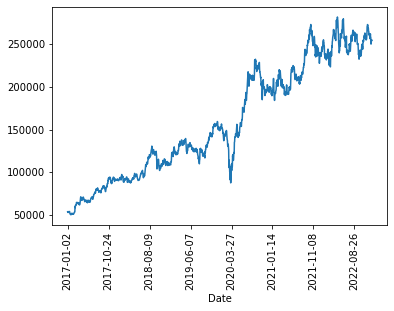

In [26]:
# checking values between 2016-01-01' to '2016-12-31

df.set_index("Date")["2017-01-01":"2022-12-31"]["1 day % return"].plot()
plt.xticks(rotation = "vertical")
# rotating of the Graph 

In [27]:
# creating a new dataframe to perform operations...
df2 = df.copy()
df2.columns


Index(['Date', 'Open', 'High', 'Low', 'Volume', 'Name', 'Close',
       '1 day % return'],
      dtype='object')

In [29]:
df2 = df.copy()
df2['Date']=pd.to_datetime(df2['Date'])
df2.set_index('Date',inplace=True)
df2.head()

Open    High     Low   Volume Name   Close  1 day % return
Date                                                                    
2017-01-02  536.91  539.88  531.14  1622458  REL  537.46    53646.102333
2017-01-03  539.81  543.35  535.47  1470751  REL  539.59    53858.959228
2017-01-04  541.32  541.37  527.15  2375547  REL  528.56    52753.585894
2017-01-05  530.47  534.88  529.36  1996483  REL  533.64    53264.594033
2017-01-06  532.06  537.41  531.51  1793427  REL  532.43    53143.069493

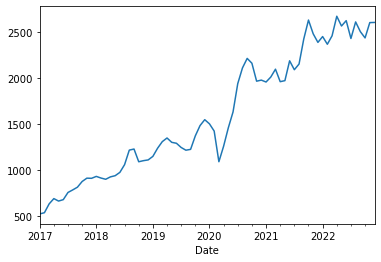

In [30]:
# plotting in a monthly manner : 

df2['Close'].resample('M').mean().plot()
b = df2['Close'].resample('M').mean()

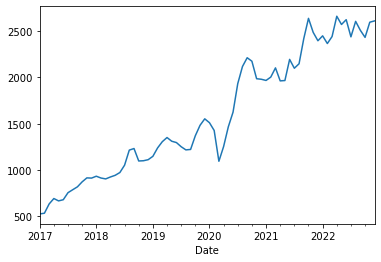

In [31]:
df2['Open'].resample('M').mean().plot()
a = df2['Open'].resample('M').mean()

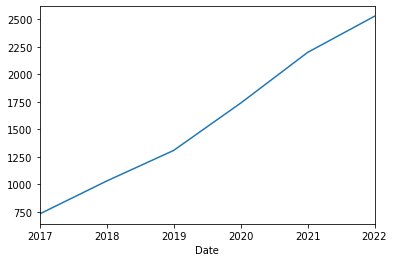

In [33]:
#Plotting closing and Open mean value in a yearly order
df2['Close'].resample('Y').mean().plot()

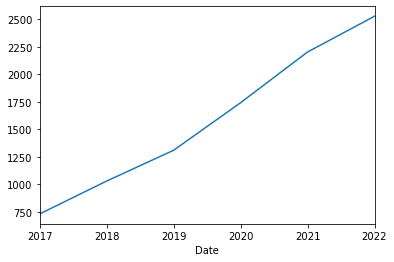

In [34]:
df2['Open'].resample('Y').mean().plot()

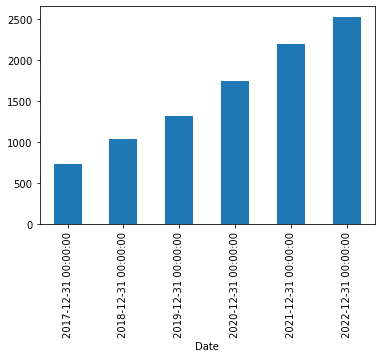

In [36]:
# plotting a histogram for closing monthly value of mean.


df2['Close'].resample('Y').mean().plot(kind = 'bar')

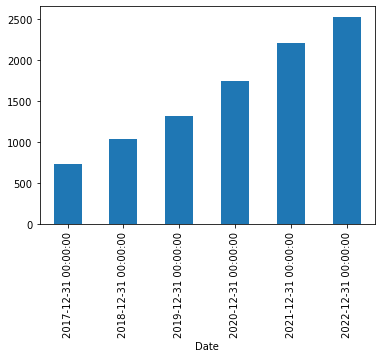

In [37]:
# plotting a histogram for opening monthly value of mean.


df2['Open'].resample('Y').mean().plot(kind = 'bar')

In [39]:
#Checking the co-relation between all the stocks.
df2.head()

Open    High     Low   Volume Name   Close  1 day % return
Date                                                                    
2017-01-02  536.91  539.88  531.14  1622458  REL  537.46    53646.102333
2017-01-03  539.81  543.35  535.47  1470751  REL  539.59    53858.959228
2017-01-04  541.32  541.37  527.15  2375547  REL  528.56    52753.585894
2017-01-05  530.47  534.88  529.36  1996483  REL  533.64    53264.594033
2017-01-06  532.06  537.41  531.51  1793427  REL  532.43    53143.069493

In [40]:
# Reading and creating indivicual dataframes for all stocks

Relience = pd.read_csv("REL.csv")
Relience.head()

Date    Open    High     Low   Volume Name   Close
0  2017-01-02  536.91  539.88  531.14  1622458  REL  537.46
1  2017-01-03  539.81  543.35  535.47  1470751  REL  539.59
2  2017-01-04  541.32  541.37  527.15  2375547  REL  528.56
3  2017-01-05  530.47  534.88  529.36  1996483  REL  533.64
4  2017-01-06  532.06  537.41  531.51  1793427  REL  532.43

In [41]:
# Reading and creating indivicual dataframes for all stocks

ITC = pd.read_csv("ITC.csv")
ITC.head()

Date    Open    High     Low   Volume Name   Close
0  2017-01-02  242.00  242.25  238.60  4887504  ITC  240.95
1  2017-01-03  240.90  245.70  239.25  7508925  ITC  243.35
2  2017-01-04  242.85  247.00  240.10  9310104  ITC  245.45
3  2017-01-05  244.50  247.85  244.10  9178665  ITC  246.75
4  2017-01-06  247.00  249.00  242.20  8093288  ITC  242.70

In [42]:
# Reading and creating indivicual dataframes for all stocks

SBI = pd.read_csv("SBI.csv")
SBI.head()

Date   Open    High    Low    Volume Name   Close
0  2017-01-02  252.5  253.65  242.6  25988990  SBI  243.60
1  2017-01-03  244.0  246.40  241.1  15963085  SBI  244.90
2  2017-01-04  245.8  246.40  242.2  11225978  SBI  242.90
3  2017-01-05  245.0  245.90  243.7  11970913  SBI  245.35
4  2017-01-06  246.0  249.00  245.5  12354302  SBI  245.90

In [44]:
Infosys = pd.read_csv("INF.csv")
Infosys.head()

Date    Open    High     Low   Volume  Name    Close
0  2017-01-02  505.55  506.48  499.68  1167611   inf  1508.20
1  2017-01-03  502.05  502.45  491.00  3389241   inf  1517.55
2  2017-01-04  497.53  502.10  496.13  3536793   inf  1510.15
3  2017-01-05  500.80  504.75  494.38  4103537   inf  1514.85
4  2017-01-06  497.45  499.43  484.03  7196724   inf  1502.40

In [45]:
# creating a dataframe that consists of all the closing values of all stocks : 

close = pd.DataFrame()

In [47]:
close['Relience'] = Relience['Close']
close['ITC'] = ITC['Close']
close['SBI'] = SBI['Close']
close['Infosys'] = Infosys['Close']

In [48]:
close.head()

Relience     ITC     SBI  Infosys
0    537.46  240.95  243.60  1508.20
1    539.59  243.35  244.90  1517.55
2    528.56  245.45  242.90  1510.15
3    533.64  246.75  245.35  1514.85
4    532.43  242.70  245.90  1502.40

Multi-Variate Analysis of the Various Tech Companies

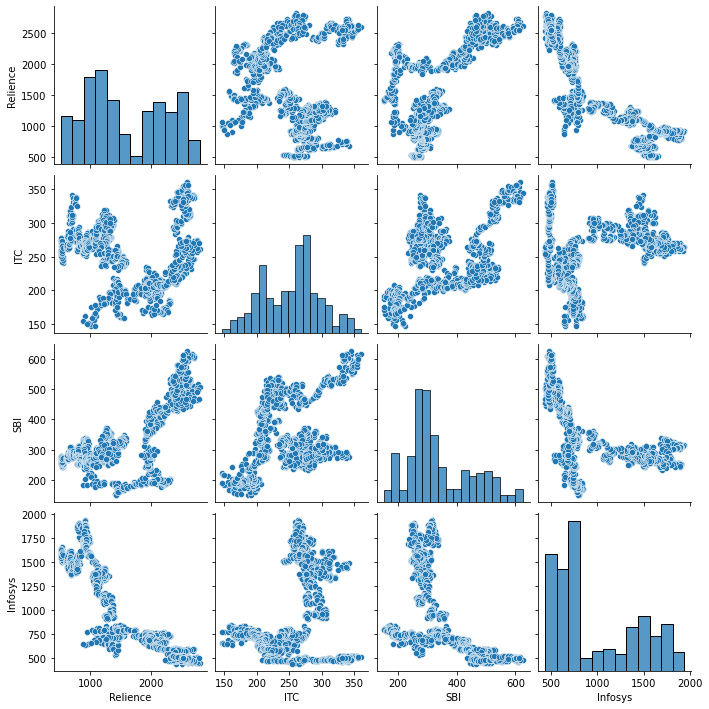

In [49]:
sns.pairplot(data = close)

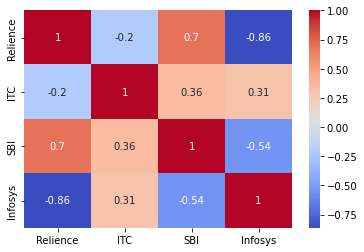

In [50]:
# Heatmap can be used to show correlation :

sns.heatmap(annot = True , data = close.corr() , cmap = 'coolwarm')

Conclusion:

From the above Heatmap we canc onclude that the stock prices for SBI and Relience are related and close to each other than the others.

In [51]:
#Analysing the daily returns for each stock and finding the underlying correlation between the same.
ch_data = pd.DataFrame()

In [54]:
ch_data['Relience_change'] = ((Relience['Close'] - Relience['Open']/Relience['Close'])*100)
ch_data['SBI_change'] = ((SBI['Close'] - SBI['Open']/SBI['Close'])*100)
ch_data['ITC_change'] = ((ITC['Close'] - ITC['Open']/ITC['Close'])*100)
ch_data['Infosys_change'] = ((Infosys['Close'] - Infosys['Open']/Infosys['Close'])*100)

In [55]:
ch_data.head()

Relience_change    SBI_change    ITC_change  Infosys_change
0     53646.102333  24256.346470  23994.564225   150786.479910
1     53858.959228  24390.367497  24236.006780   151721.917070
2     52753.585894  24188.806093  24446.059279   150982.054266
3     53264.594033  24435.142653  24575.911854   151451.940621
4     53143.069493  24489.959333  24168.228265   150206.889643

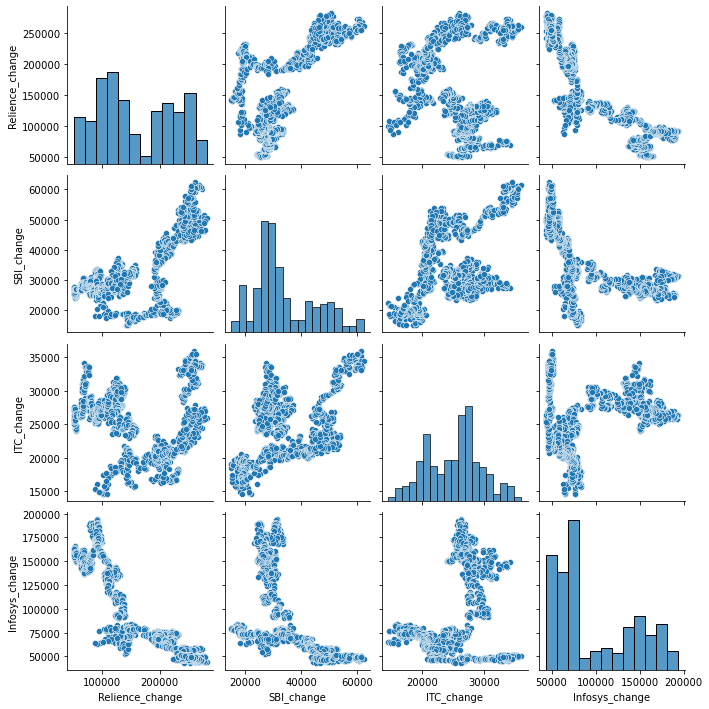

In [56]:
sns.pairplot(data=ch_data)

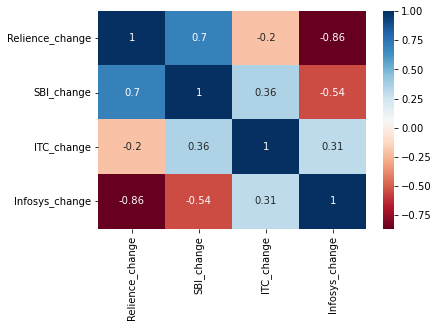

In [57]:
sns.heatmap(annot = True , data = ch_data.corr() , cmap = 'RdBu')

Conclusion :
As seen in the above heatmap we can conclude that SBI and Relience  have the closest correlation when coming on changes.